In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
import time
import glob
import re
import random
import torch
from scipy.stats import entropy

sys.path.insert(0, '/Data/user/panhailin/code/git_lab/npspy/')
import npspy as nps
from npspy import npsc

In [2]:
npsc.clean_ref_obj_by_ae_and_save(
    obj='../../00.data/hp1_1_valid80.pkl',
    fit_name='hp1_1_valid80',
    output_save_dir='../../03.results/method_setup/hp1_1/',
    epochs=20,
    save_reconstruction=True,
    weight_decay=1e-5,
)

Iteration 1/3 for training ShapeAwareAutoencoder...
Model ShapeAwareAutoencoder has total parameter number: 1.02 M
Epoch   0 / 20 train_loss: 0.005083 | val_loss: 0.002887 | lr: 0.001
Epoch   1 / 20 train_loss: 0.002569 | val_loss: 0.002333 | lr: 0.001
Epoch   2 / 20 train_loss: 0.002048 | val_loss: 0.001894 | lr: 0.001
Epoch   3 / 20 train_loss: 0.001910 | val_loss: 0.001708 | lr: 0.001
Epoch   4 / 20 train_loss: 0.001806 | val_loss: 0.002106 | lr: 0.001
Epoch   5 / 20 train_loss: 0.001727 | val_loss: 0.002004 | lr: 0.001
Epoch   6 / 20 train_loss: 0.001678 | val_loss: 0.002304 | lr: 0.001
Epoch   7 / 20 train_loss: 0.001673 | val_loss: 0.001787 | lr: 0.0005
Epoch   8 / 20 train_loss: 0.001504 | val_loss: 0.001596 | lr: 0.0005
Epoch   9 / 20 train_loss: 0.001487 | val_loss: 0.001533 | lr: 0.0005
Epoch  10 / 20 train_loss: 0.001421 | val_loss: 0.001374 | lr: 0.0005
Epoch  11 / 20 train_loss: 0.001398 | val_loss: 0.001481 | lr: 0.0005
Epoch  12 / 20 train_loss: 0.001383 | val_loss: 0.00

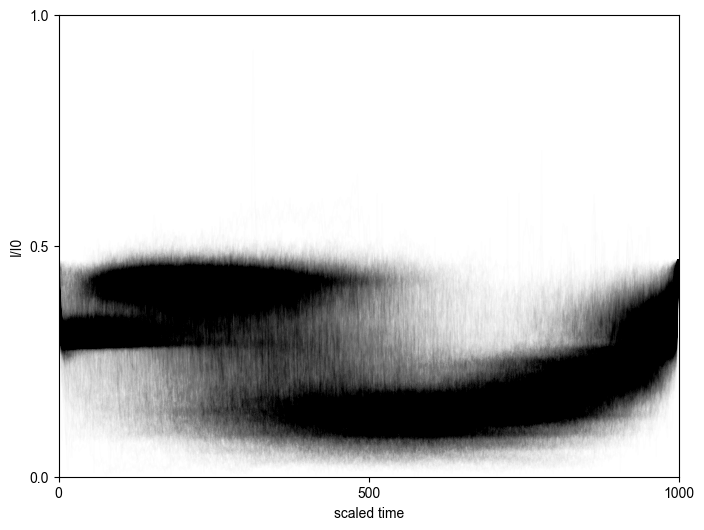

In [3]:
clean_obj = nps.io.read_pickle('../../03.results/method_setup/hp1_1/hp1_1_valid80_clean_obj.pkl')
nps.pl.draw_stack_plot(clean_obj)
plt.yticks([0.0,0.5,1.0], [0.0, 0.5, 1.0])
plt.xticks([0,500,1000], [0, 500, 1000])
plt.savefig('../../05.figures/method_setup/hp1_1/clean_stack.pdf', bbox_inches='tight')
plt.savefig('../../05.figures/method_setup/hp1_1/clean_stack.png', dpi=600)

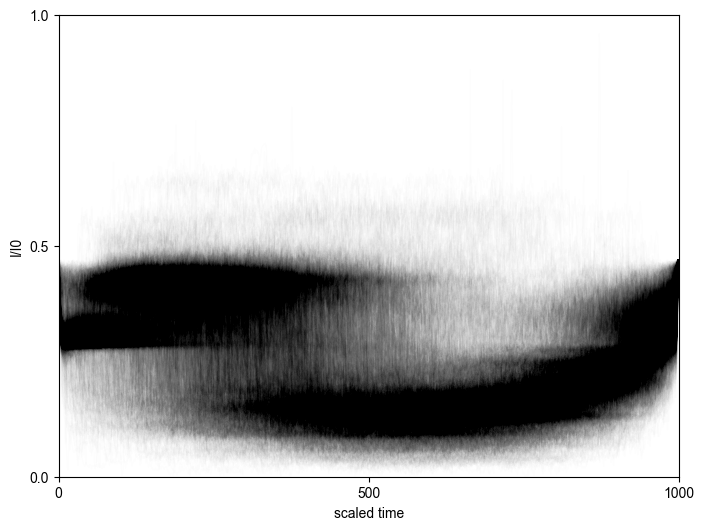

In [4]:
obj = nps.io.read_pickle('../../00.data/hp1_1_valid80.pkl')
nps.pl.draw_stack_plot(obj)
plt.yticks([0.0,0.5,1.0], [0.0, 0.5, 1.0])
plt.xticks([0,500,1000], [0, 500, 1000])
plt.savefig('../../05.figures/method_setup/hp1_1/valid_stack.pdf', bbox_inches='tight')
plt.savefig('../../05.figures/method_setup/hp1_1/valid_stack.png', dpi=600)

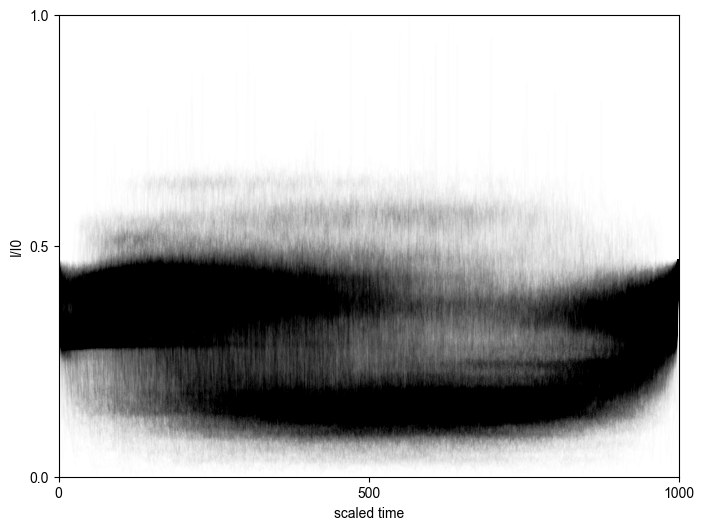

In [5]:
rejected_obj = nps.io.read_pickle('../../03.results/method_setup/hp1_1/hp1_1_valid80_rejected_obj.pkl')
nps.pl.draw_stack_plot(rejected_obj)
plt.yticks([0.0,0.5,1.0], [0.0, 0.5, 1.0])
plt.xticks([0,500,1000], [0, 500, 1000])
plt.savefig('../../05.figures/method_setup/hp1_1/rejected_stack.pdf', bbox_inches='tight')
plt.savefig('../../05.figures/method_setup/hp1_1/rejected_stack.png', dpi=600)

In [6]:
error_df = pd.read_csv("../../03.results/method_setup/hp1_1/hp1_1_valid80_error.csv", index_col=0)
error_df = error_df.sort_values('reconstruction_error')

In [7]:
clean_error_df = error_df.loc[clean_obj.keys()]
clean_error_df = clean_error_df.sort_values('reconstruction_error')

# 举例画图

In [8]:
clean_X_df = npsc.get_X_from_an_obj(clean_obj)
read_ids = clean_X_df.index.to_series().sample(10, random_state=42)

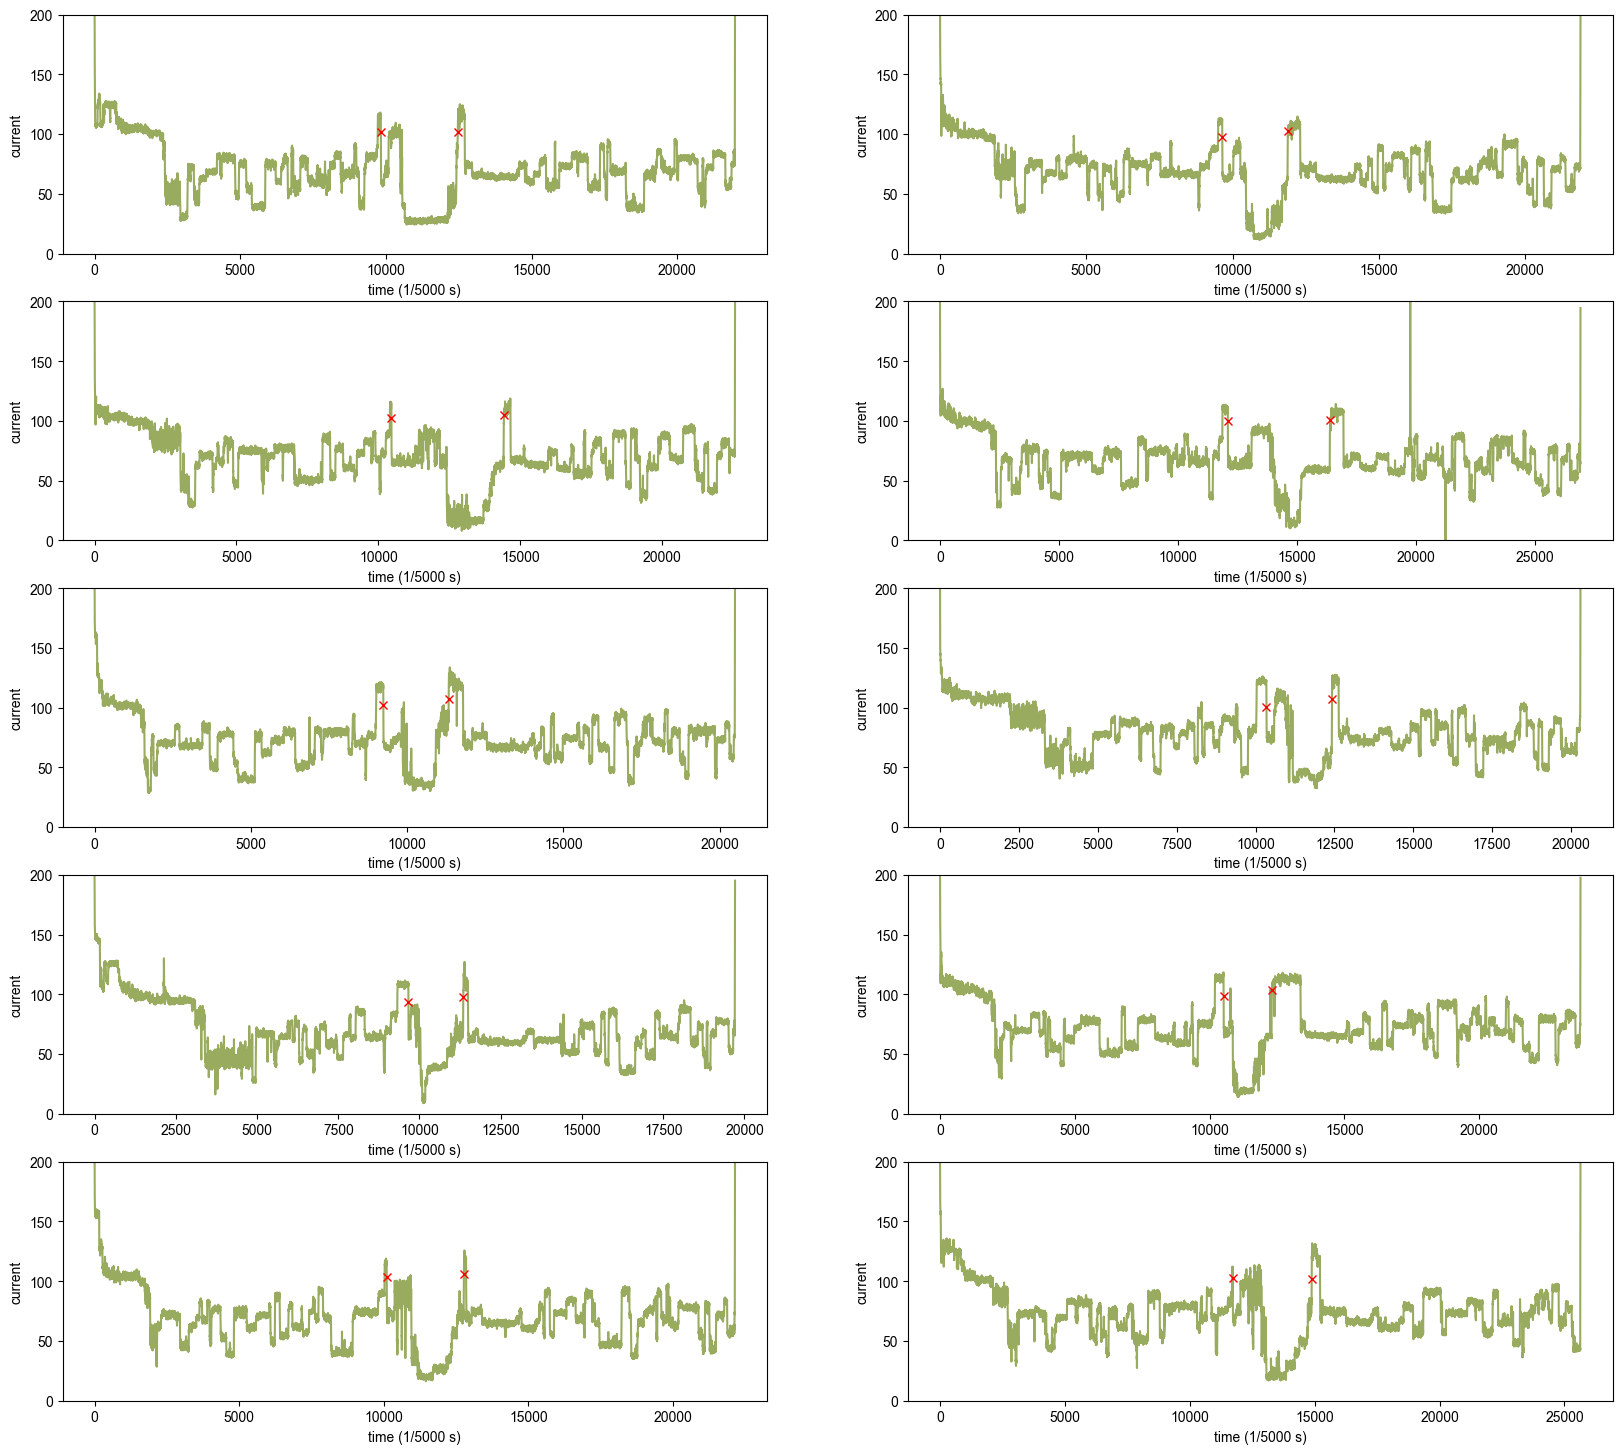

In [10]:
fig, ax = plt.subplots(figsize=(20,18), nrows=5, ncols=2)
for indx, read_id in enumerate(read_ids):
    r = indx // 2
    c = indx % 2
    nps.pl.draw_one_read_with_window(clean_obj, read_id, ax=ax[r,c],)
    ax[r,c].set_ylim(0,200)
    ax[r,c].set_yticks([0,50,100,150,200], [0,50,100,150,200])
plt.savefig("../../05.figures/method_setup/hp1_1/clean_cases.pdf", bbox_inches='tight')

In [11]:
rejected_X_df = npsc.get_X_from_an_obj(rejected_obj)
read_ids = error_df.tail(100).index.to_series().sample(10, random_state=42)

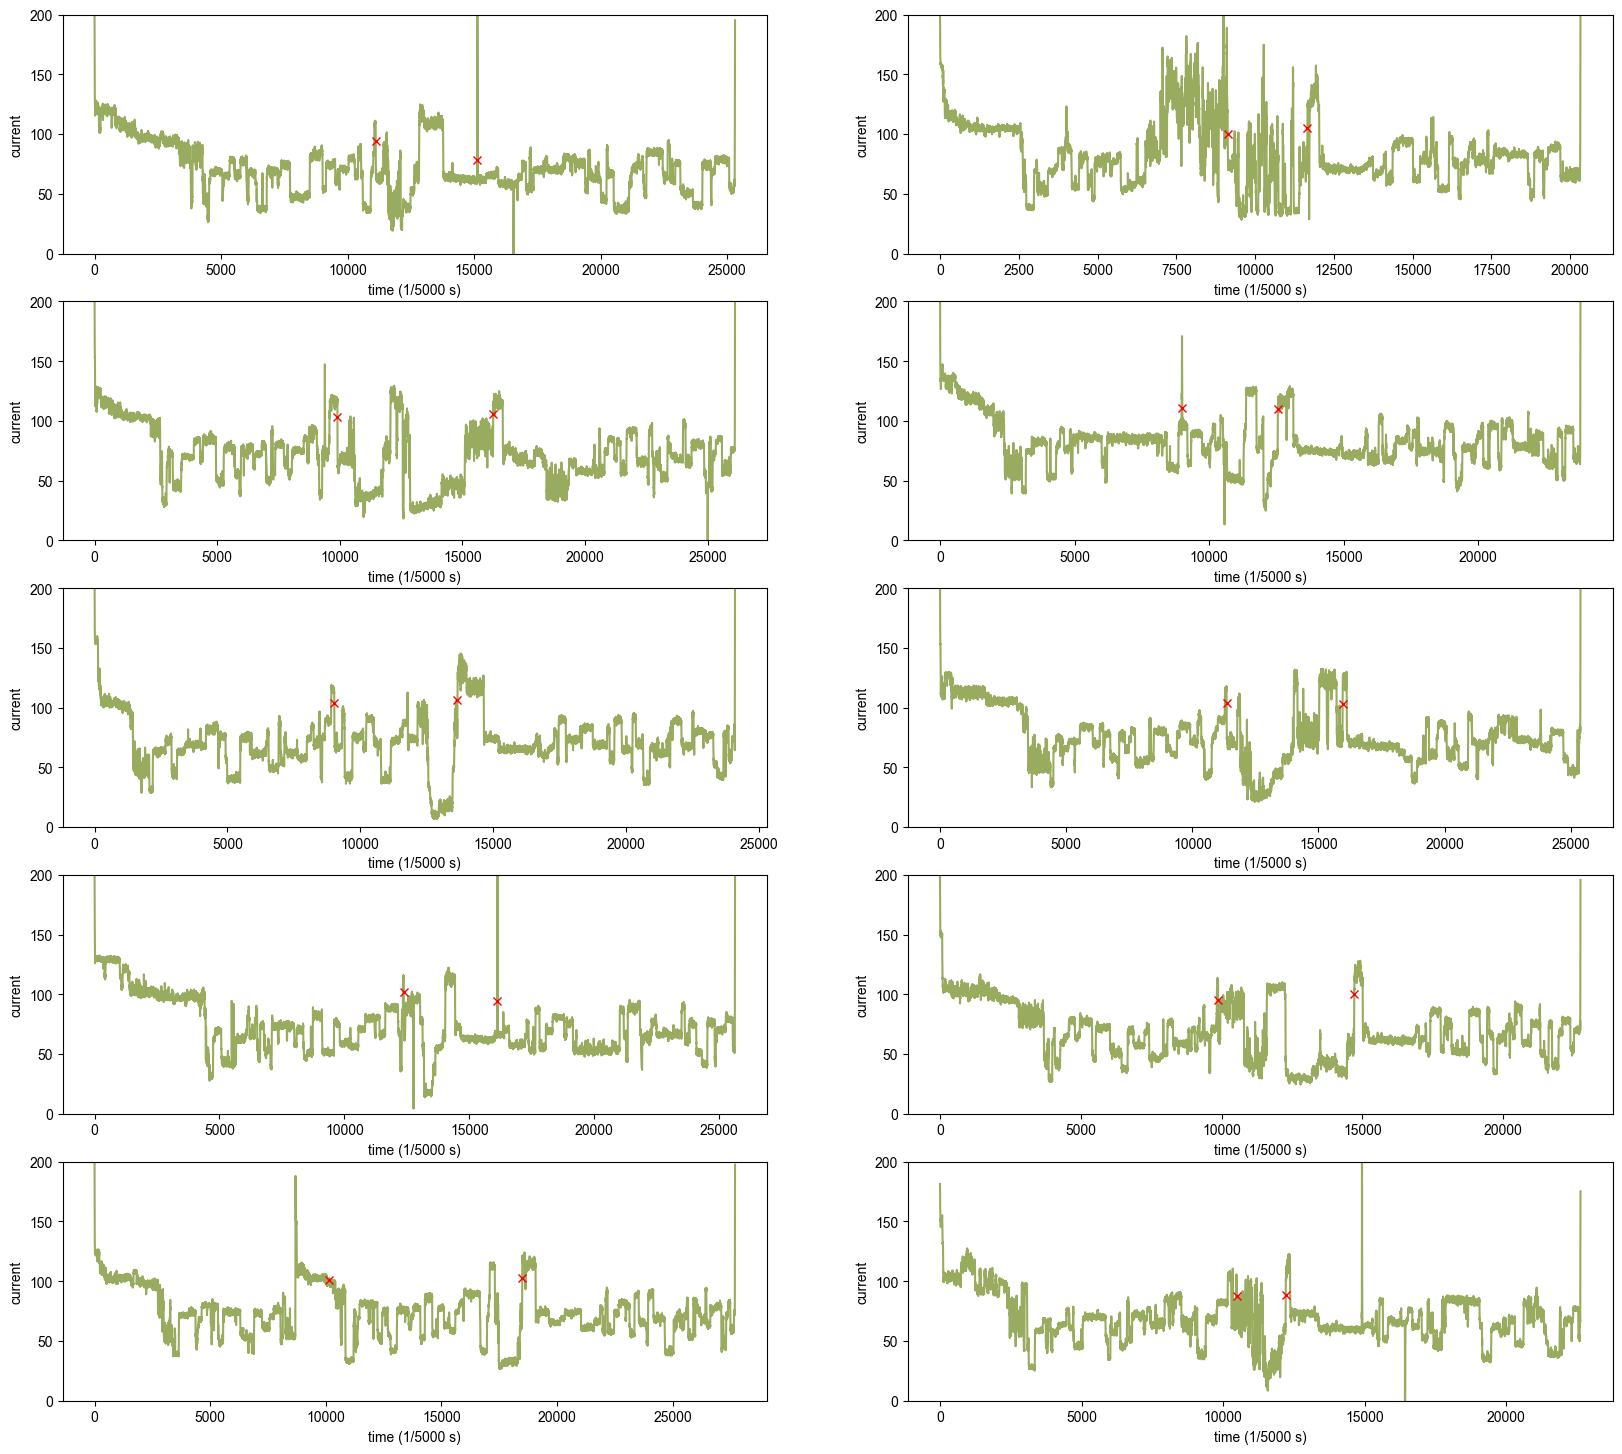

In [14]:
fig, ax = plt.subplots(figsize=(20,18), nrows=5, ncols=2)
for indx, read_id in enumerate(read_ids):
    r = indx // 2
    c = indx % 2
    nps.pl.draw_one_read_with_window(rejected_obj, read_id, ax=ax[r,c])
    ax[r,c].set_ylim(0,200)
    ax[r,c].set_yticks([0,50,100,150,200], [0,50,100,150,200])
plt.savefig("../../05.figures/method_setup/hp1_1/rejected_cases.pdf", bbox_inches='tight')

# 重构

In [15]:
rec_X_df = pd.read_csv("../../03.results/method_setup/hp1_1//hp1_1_valid80_reconstructed_signals.csv", index_col=0)
read_ids = clean_X_df.index.to_series().sample(12, random_state=42)

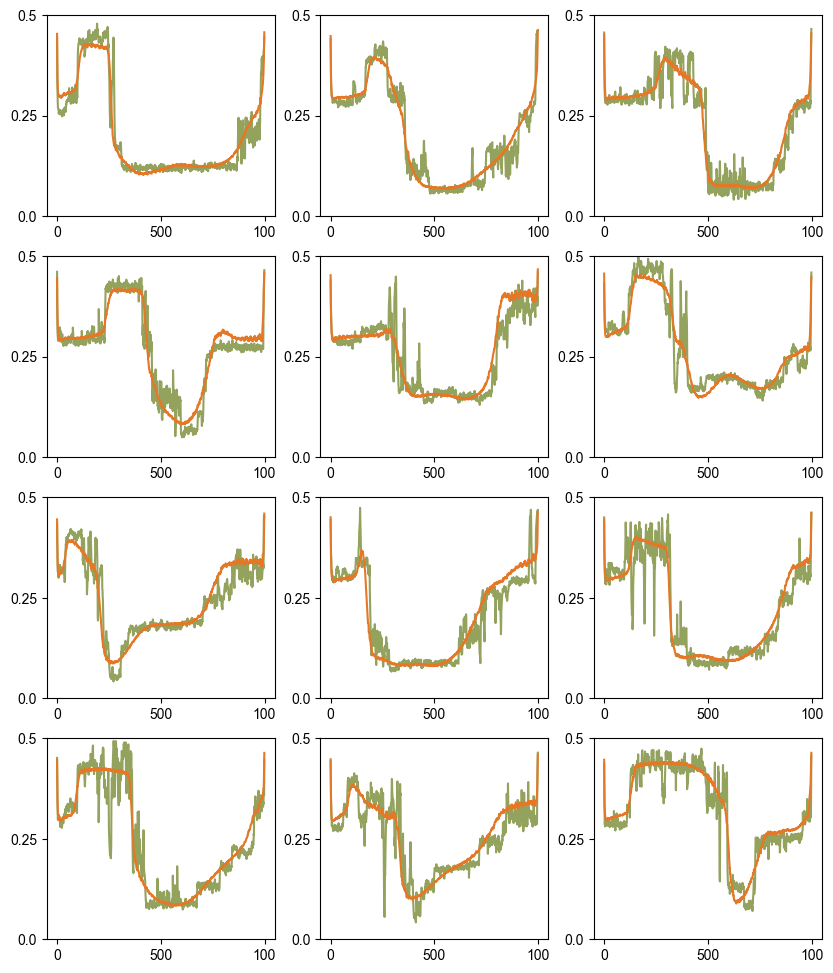

In [16]:
fig, ax = plt.subplots(figsize=(10,12), nrows=4, ncols=3)
for indx, read_id in enumerate(read_ids):
    r = indx // 3
    c = indx % 3
    ax[r,c].plot(clean_X_df.loc[read_id].to_numpy(), color='#93A25D')
    ax[r,c].plot(rec_X_df.loc[read_id].to_numpy(), color='#E47827')
    ax[r,c].set_ylim(0,0.5)
    ax[r,c].set_yticks([0, 0.25, 0.5], [0.0, 0.25, 0.5])
    ax[r,c].set_xticks([0, 500, 1000], [0, 500, 100])
    # ax[r,c].set_ylabel("I/I0")
    # ax[r,c].set_xlabel("scaled time")
plt.savefig("../../05.figures/method_setup/hp1_1/clean_reconstruct_cases.pdf", bbox_inches='tight')

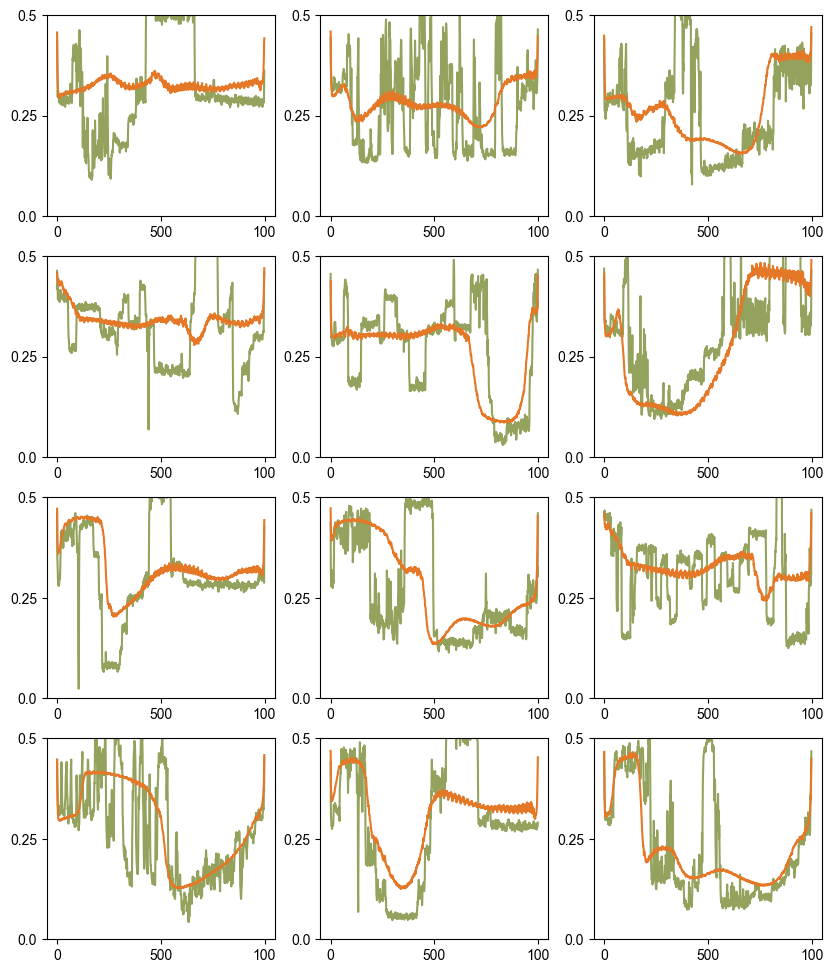

In [17]:
read_ids = error_df.tail(100).index.to_series().sample(12, random_state=42)
rejected_X_df = npsc.get_X_from_an_obj(rejected_obj)
fig, ax = plt.subplots(figsize=(10,12), nrows=4, ncols=3)
for indx, read_id in enumerate(read_ids):
    r = indx // 3
    c = indx % 3
    ax[r,c].plot(rejected_X_df.loc[read_id].to_numpy(), color='#93A25D')
    ax[r,c].plot(rec_X_df.loc[read_id].to_numpy(), color='#E47827')
    ax[r,c].set_ylim(0,0.5)
    ax[r,c].set_yticks([0, 0.25, 0.5], [0.0, 0.25, 0.5])
    ax[r,c].set_xticks([0, 500, 1000], [0, 500, 100])
plt.savefig("../../05.figures/method_setup/hp1_1/rejected_reconstruct_cases.pdf", bbox_inches='tight')

# 比较mean、std、pd/rd

In [18]:
nps.tl.set_att_for_an_obj(clean_obj, atts=['mean_of_I/I0', 'std_of_I/I0', 'pd2rd', 'window_length', 'median_of_I/I0'], in_place=True)
clean_stat_df = nps.tl.get_att_from_an_obj(clean_obj, atts=['mean_of_I/I0', 'std_of_I/I0', 'pd2rd', 'window_length', 'median_of_I/I0'])

nps.tl.set_att_for_an_obj(rejected_obj, atts=['mean_of_I/I0', 'std_of_I/I0', 'pd2rd', 'window_length', 'median_of_I/I0'], in_place=True)
rejected_stat_df = nps.tl.get_att_from_an_obj(rejected_obj, atts=['mean_of_I/I0', 'std_of_I/I0', 'pd2rd', 'window_length', 'median_of_I/I0'])

nps.tl.set_att_for_an_obj(obj, atts=['mean_of_I/I0', 'std_of_I/I0', 'pd2rd', 'window_length', 'median_of_I/I0'], in_place=True)
obj_stat_df = nps.tl.get_att_from_an_obj(obj, atts=['mean_of_I/I0', 'std_of_I/I0', 'pd2rd', 'window_length', 'median_of_I/I0'])

In [19]:
tmp0_df = clean_stat_df[['mean_of_I/I0', 'std_of_I/I0', 'pd2rd']].copy()
tmp1_df = rejected_stat_df[['mean_of_I/I0', 'std_of_I/I0', 'pd2rd']].copy()
tmp0_df['kind'] = 'clean'
tmp1_df['kind'] = 'rejected'
stat_df = pd.concat([tmp0_df, tmp1_df])
stat_df

,mean_of_I/I0,std_of_I/I0,pd2rd,kind
hp1_1_2_sample1_channel14_Read_0_87.64~87.71_26292478-26312777,0.193562,0.094947,0.083600,clean
hp1_1_1_sample1_channel232_Read_0_26.80~26.88_8040051-8063733,0.273295,0.116002,0.146736,clean
hp1_1_2_sample1_channel117_Read_0_116.32~116.41_34897054-34922287,0.234036,0.102229,0.106884,clean
hp1_1_1_sample1_channel253_Read_0_31.87~31.96_9562402-9586564,0.225455,0.080053,0.078512,clean
hp1_1_2_sample1_channel220_Read_0_104.36~104.44_31308276-31330593,0.210449,0.107744,0.122508,clean
...,...,...,...,...
hp1_1_2_sample1_channel95_Read_0_97.57~97.66_29270749-29297495,0.222650,0.105017,0.106147,rejected
hp1_1_2_sample1_channel58_Read_0_101.25~101.32_30373873-30394760,0.210670,0.068289,0.054915,rejected
hp1_1_2_sample1_channel204_Read_0_33.38~33.46_10014821-10037513,0.312976,0.149417,0.142473,rejected
hp1_1_1_sample1_channel148_Read_0_51.21~51.28_15361946-15382848,0.260054,0.099149,0.100995,rejected


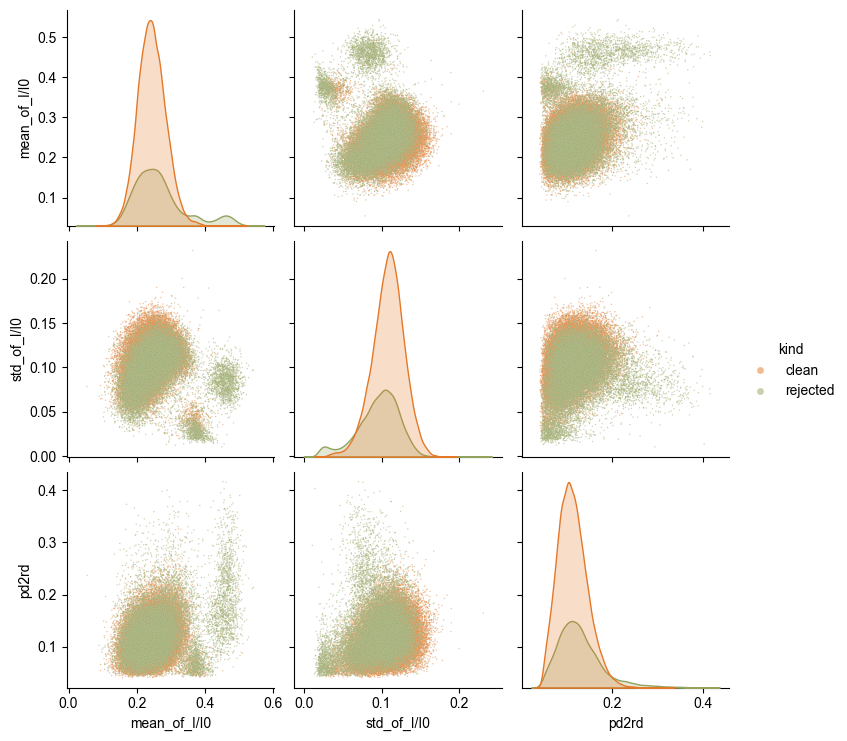

In [20]:
g = sns.pairplot(stat_df, hue='kind', plot_kws={'s': 1, 'alpha': 0.5}, palette={'clean': '#E47827', 'rejected': '#93A25D'})
if g._legend is not None:
    for handle in g._legend.legend_handles:
        handle.set_markersize(5)  # 调整标记大小
        handle.set_marker('o')     # 确保是圆形标记
plt.savefig("../../05.figures/method_setup/hp1_1/three_stat_pair_plot.pdf", bbox_inches='tight')
plt.savefig("../../05.figures/method_setup/hp1_1/three_stat_pair_plot.png", bbox_inches='tight', dpi=600)

# dm

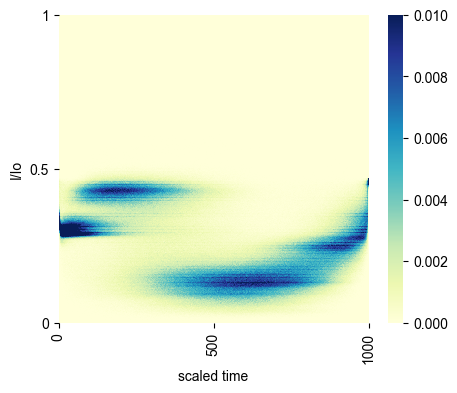

In [21]:
clean_dm = nps.dn.get_density_matrix_from_an_obj(clean_obj)
nps.pl.draw_density_heatmap(clean_dm, vmax=0.01)
plt.savefig("../../05.figures/method_setup/hp1_1/clean_dm.pdf")
plt.savefig("../../05.figures/method_setup/hp1_1/clean_dm.png", dpi=600)

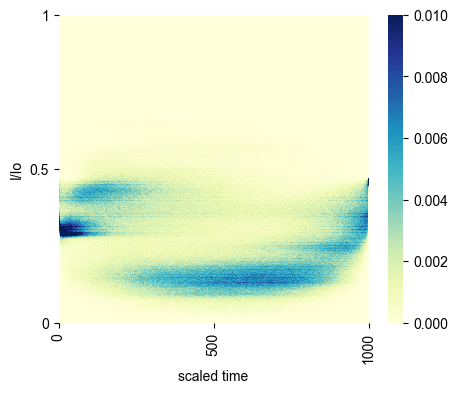

In [22]:
rejected_dm = nps.dn.get_density_matrix_from_an_obj(rejected_obj)
nps.pl.draw_density_heatmap(rejected_dm, vmax=0.01)
plt.savefig("../../05.figures/method_setup/hp1_1/rejected_dm.pdf")
plt.savefig("../../05.figures/method_setup/hp1_1/rejected_dm.png", dpi=600)

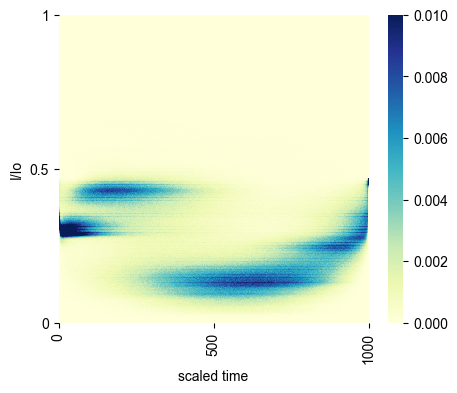

In [23]:
dm = nps.dn.get_density_matrix_from_an_obj(obj)
nps.pl.draw_density_heatmap(dm, vmax=0.01)
plt.savefig("../../05.figures/method_setup/hp1_1/valid_dm.pdf")
plt.savefig("../../05.figures/method_setup/hp1_1/valid_dm.png", dpi=600)

In [24]:
entropy(clean_dm).mean(), entropy(rejected_dm).mean(), entropy(dm).mean()

(np.float64(5.597647542670358),
 np.float64(5.913324386615362),
 np.float64(5.728209343975457))

In [25]:
random_entropies = []
for i in range(10):
    np.random.seed(i)
    random_obj = nps.tl.extract_reads_as_an_obj(obj, np.random.choice(list(obj.keys()), size=len(clean_obj), replace=False))
    random_dm = nps.dn.get_density_matrix_from_an_obj(random_obj)
    random_entropies.append(entropy(random_dm).mean())

In [26]:
entropy_df = pd.DataFrame({'class':['valid', 'clean', 'rejected'] + ['random'] * 10, 'entropy': [entropy(dm).mean(), entropy(clean_dm).mean(), entropy(rejected_dm).mean()] + random_entropies})
entropy_df

,class,entropy
0,valid,5.728209
1,clean,5.597648
2,rejected,5.913324
3,random,5.726137
4,random,5.727909
5,random,5.725705
6,random,5.726431
7,random,5.727681
8,random,5.726065
9,random,5.723461


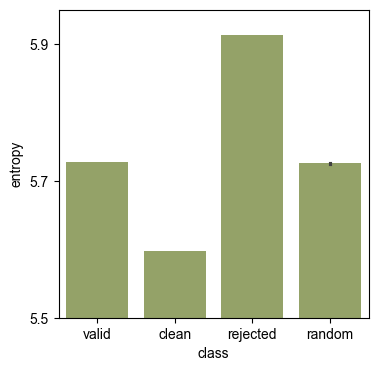

In [27]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(data=entropy_df, x='class', y='entropy', width=0.8, color='#99AB5F')
plt.yticks([5.5, 5.7, 5.9], [5.5, 5.7, 5.9])
plt.ylim(5.5,5.95)
plt.savefig("../../05.figures/method_setup/hp1_1/entropy.pdf", bbox_inches='tight')

In [28]:
random_entropies

[np.float64(5.726136581292653),
 np.float64(5.7279091945026215),
 np.float64(5.725705184717399),
 np.float64(5.726431392160722),
 np.float64(5.727681122433624),
 np.float64(5.726065319290225),
 np.float64(5.723460527818748),
 np.float64(5.72484188227647),
 np.float64(5.722307784091145),
 np.float64(5.72716457154557)]

In [29]:
def _variance(values, probabilities):
    values = np.array(values)
    probs = np.array(probabilities)
    mean_ = np.sum(values * probs)  # 计算均值
    var_ = np.sum(probs * (values - mean_) ** 2)
    return var_

def variance(dm):
    return np.mean([_variance(np.arange(1,0,-1/len(dm)), dm[:,i]) for i in range(len(dm))])
    

In [30]:
variance(clean_dm), variance(rejected_dm), variance(dm)

(np.float64(0.008335902242299083),
 np.float64(0.0134891518991038),
 np.float64(0.010121712758774479))

In [31]:
random_vars = []
for i in range(10):
    np.random.seed(i)
    random_obj = nps.tl.extract_reads_as_an_obj(obj, np.random.choice(list(obj.keys()), size=len(clean_obj), replace=False))
    random_dm = nps.dn.get_density_matrix_from_an_obj(random_obj)
    random_vars.append(variance(random_dm))

In [32]:
var_df = pd.DataFrame({'class':['valid', 'clean', 'rejected'] + ['random'] * 10, 'var': [variance(dm), variance(clean_dm), variance(rejected_dm)] + random_vars})
var_df

,class,var
0,valid,0.010122
1,clean,0.008336
2,rejected,0.013489
3,random,0.010138
4,random,0.010145
5,random,0.010103
6,random,0.010115
7,random,0.010158
8,random,0.010134
9,random,0.010062


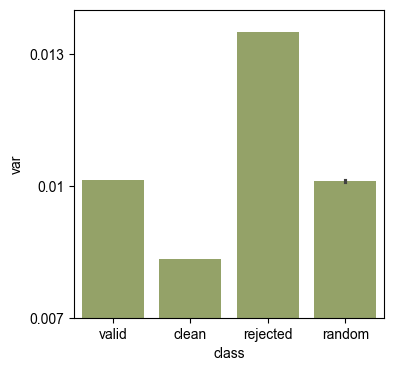

In [33]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(data=var_df, x='class', y='var', color='#99AB5F')
plt.yticks([0.007, 0.010, 0.013], [0.007, 0.010, 0.013])
plt.ylim(0.007,0.014)
plt.savefig("../../05.figures/method_setup/hp1_1/var.pdf", bbox_inches='tight')

# 利用训练好的模型对valid20做过滤

In [34]:
npsc.clean_an_obj_with_trained_model(
    obj='../../00.data/hp1_1_valid20.pkl',
    save_dir='../../03.results/method_setup/hp1_1/',
    save_name='hp1_1_valid20',
    fit_name='hp1_1_valid80',
    error_threshold_file='../../03.results/method_setup/hp1_1/hp1_1_valid80_error_threshold.csv',
    lzc_threshold_file='../../03.results/method_setup/hp1_1/hp1_1_valid80_lzc_threshold.csv',
    save_reconstruction=True,
)

Model ShapeAwareAutoencoder has total parameter number: 1.02 M
error threshold: 0.0018450539
lzc threshold: 113.0
Number of inconsistent reads: 4740
Number of clean reads: 11271


<Axes: xlabel='scaled time', ylabel='I/I0'>

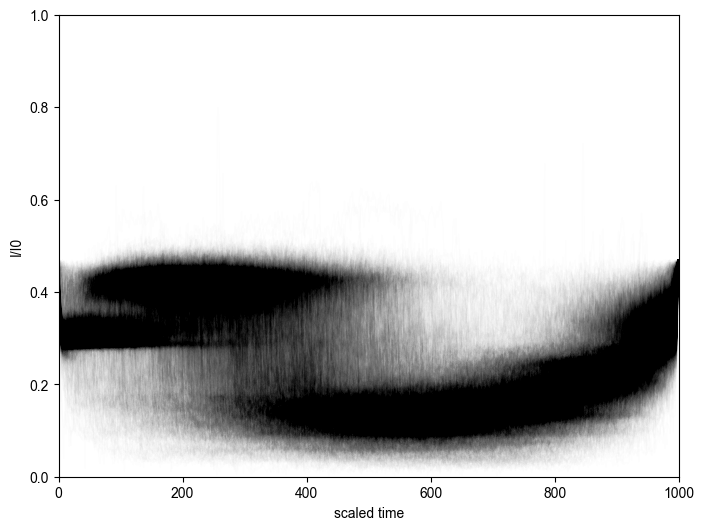

In [35]:
v20_clean_obj = nps.io.read_pickle('../../03.results/method_setup/hp1_1/hp1_1_valid20_clean_obj.pkl')
nps.pl.draw_stack_plot(v20_clean_obj)

<Axes: xlabel='scaled time', ylabel='I/I0'>

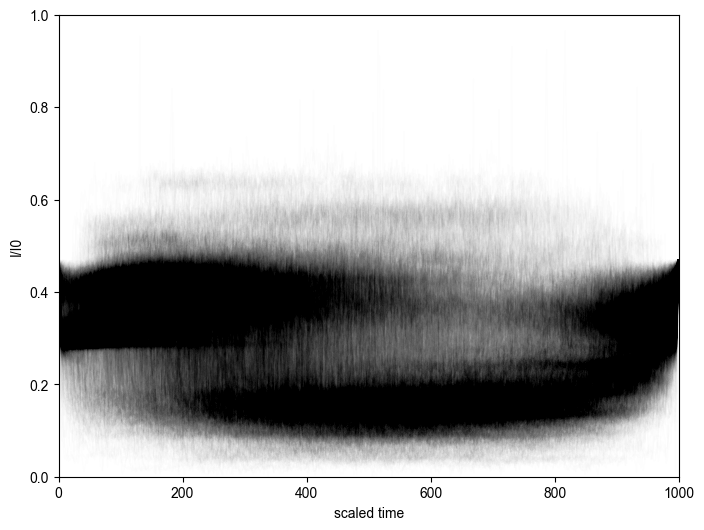

In [36]:
v20_rejected_obj = nps.io.read_pickle('../../03.results/method_setup/hp1_1/hp1_1_valid20_rejected_obj.pkl')
nps.pl.draw_stack_plot(v20_rejected_obj)